# Regression Analysis Exam Practice

This notebook creates two sample datasets (d1.csv and d2.csv), loads them, and performs regression analysis as described in the exam question.

In [1]:
# 1. Create Sample Dataset d1.csv
import numpy as np
import pandas as pd
np.random.seed(42)

# Linear relationship with some noise
d1_x = np.linspace(0, 10, 50)
d1_y = 2.5 * d1_x + np.random.normal(0, 2, 50)
df_d1 = pd.DataFrame({'x': d1_x, 'y': d1_y})
df_d1.to_csv('d1.csv', index=False)
df_d1.head()

,x,y
0,0.000000,0.993428
1,0.204082,0.233675
2,0.408163,2.315785
3,0.612245,4.576672
4,0.816327,1.572510


In [2]:
# 2. Create Sample Dataset d2.csv
# Nonlinear relationship or more noise
d2_x = np.linspace(0, 10, 50)
d2_y = 2.5 * d2_x + 10 * np.sin(d2_x) + np.random.normal(0, 2, 50)
df_d2 = pd.DataFrame({'x': d2_x, 'y': d2_y})
df_d2.to_csv('d2.csv', index=False)
df_d2.head()

,x,y
0,0.000000,0.648168
1,0.204082,1.766719
2,0.408163,3.635806
3,0.612245,8.501025
4,0.816327,11.389163


In [3]:
# 3. Load Datasets
df_d1 = pd.read_csv('d1.csv')
df_d2 = pd.read_csv('d2.csv')
print('d1.csv head:')
print(df_d1.head())
print('\nd2.csv head:')
print(df_d2.head())

d1.csv head:
          x         y
0  0.000000  0.993428
1  0.204082  0.233675
2  0.408163  2.315785
3  0.612245  4.576672
4  0.816327  1.572510

d2.csv head:
          x          y
0  0.000000   0.648168
1  0.204082   1.766719
2  0.408163   3.635806
3  0.612245   8.501025
4  0.816327  11.389163


## 4. Exploratory Data Analysis (EDA) and Initial Observations

d1.csv summary:
               x          y
count  50.000000  50.000000
mean    5.000000  12.049052
std     2.974975   7.326024
min     0.000000   0.233675
25%     2.500000   5.792118
50%     5.000000  12.168247
75%     7.500000  18.940290
max    10.000000  26.093836

d2.csv summary:
               x          y
count  50.000000  50.000000
mean    5.000000  14.277190
std     2.974975   9.600478
min     0.000000  -2.822904
25%     2.500000   6.342395
50%     5.000000  12.894415
75%     7.500000  22.271486
max    10.000000  31.566624


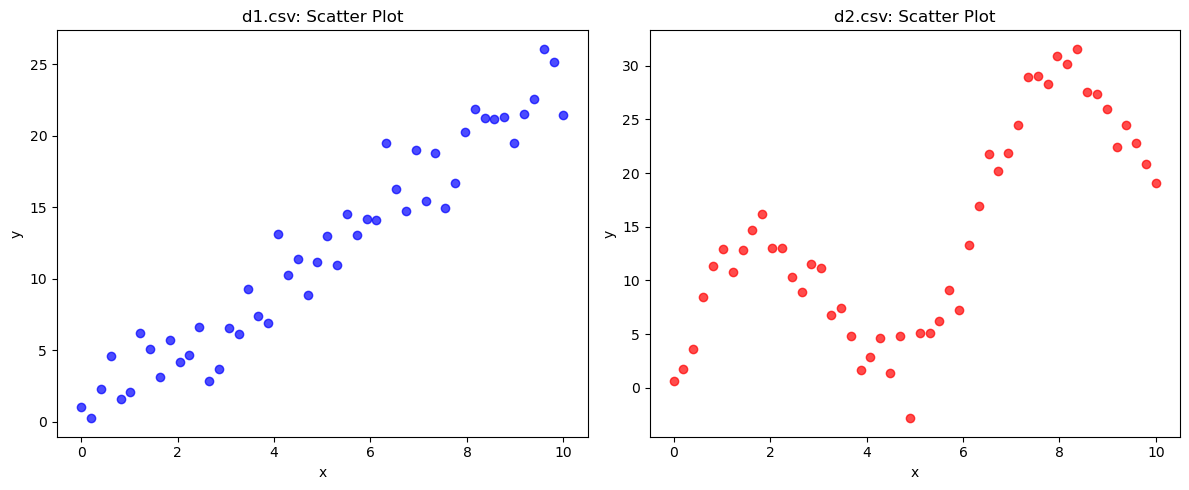

In [4]:
# EDA: Summary statistics and scatter plots
import matplotlib.pyplot as plt

print('d1.csv summary:')
print(df_d1.describe())
print('\nd2.csv summary:')
print(df_d2.describe())

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(df_d1['x'], df_d1['y'], color='blue', alpha=0.7)
plt.title('d1.csv: Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1,2,2)
plt.scatter(df_d2['x'], df_d2['y'], color='red', alpha=0.7)
plt.title('d2.csv: Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

## 5. Regression Analysis and Metrics


d1.csv Regression Results:
Slope: 2.384, Intercept: 0.129
MSE: 3.301, R^2: 0.937


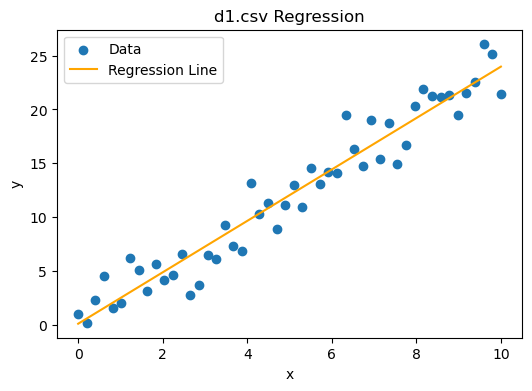


d2.csv Regression Results:
Slope: 2.255, Intercept: 3.000
MSE: 46.205, R^2: 0.488


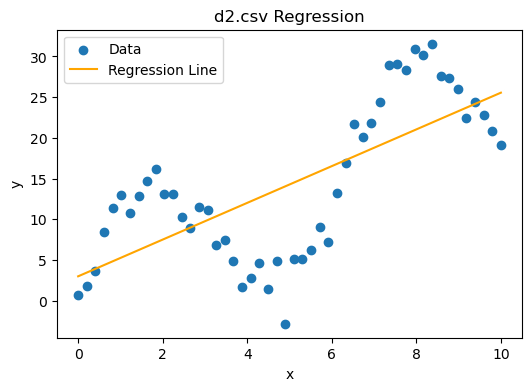

In [5]:
# Fit regression models and report metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

results = {}
for name, df in zip(['d1', 'd2'], [df_d1, df_d2]):
    X = df[['x']].values
    y = df['y'].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    coef = model.coef_[0]
    intercept = model.intercept_
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    results[name] = {'coef': coef, 'intercept': intercept, 'mse': mse, 'r2': r2}
    print(f"\n{name}.csv Regression Results:")
    print(f"Slope: {coef:.3f}, Intercept: {intercept:.3f}")
    print(f"MSE: {mse:.3f}, R^2: {r2:.3f}")
    plt.figure(figsize=(6,4))
    plt.scatter(X, y, label='Data')
    plt.plot(X, y_pred, color='orange', label='Regression Line')
    plt.title(f'{name}.csv Regression')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

## 6. Compare Results and Interpret Fit & Variability

In [6]:
# Compare slopes, intercepts, R^2 values
print('Comparison of Regression Results:')
for name in ['d1', 'd2']:
    print(f"{name}.csv: Slope={results[name]['coef']:.3f}, Intercept={results[name]['intercept']:.3f}, R^2={results[name]['r2']:.3f}")

if results['d1']['r2'] > results['d2']['r2']:
    print("d1.csv has a better fit (higher R^2), likely more linear and less variable.")
else:
    print("d2.csv has a lower R^2, possibly due to nonlinearity or higher variability.")

Comparison of Regression Results:
d1.csv: Slope=2.384, Intercept=0.129, R^2=0.937
d2.csv: Slope=2.255, Intercept=3.000, R^2=0.488
d1.csv has a better fit (higher R^2), likely more linear and less variable.


## 7. Low R² Score Interpretation

In [7]:
# Discuss low R^2 score for d2.csv
if results['d2']['r2'] < 0.5:
    print("A low R^2 score in d2.csv suggests the linear model does not explain much of the variance. This may be due to nonlinearity, noise, or outliers. It does not necessarily mean the model is incorrect, but that a linear fit may not be appropriate.")

A low R^2 score in d2.csv suggests the linear model does not explain much of the variance. This may be due to nonlinearity, noise, or outliers. It does not necessarily mean the model is incorrect, but that a linear fit may not be appropriate.


## 8. Improving the Model and Data Transformation

Polynomial Regression R^2 for d2.csv: 0.555


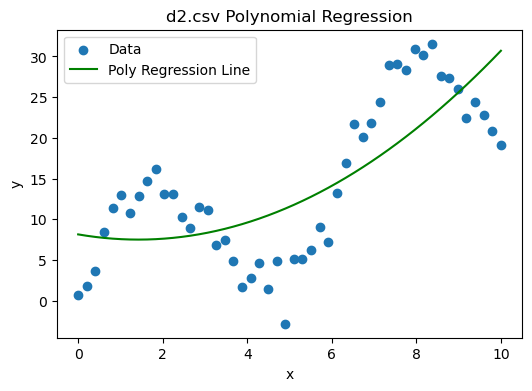

In [8]:
# Try polynomial regression for d2.csv
from sklearn.preprocessing import PolynomialFeatures

X = df_d2[['x']].values
y = df_d2['y'].values
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_poly_pred = model_poly.predict(X_poly)
r2_poly = r2_score(y, y_poly_pred)
print(f"Polynomial Regression R^2 for d2.csv: {r2_poly:.3f}")
plt.figure(figsize=(6,4))
plt.scatter(X, y, label='Data')
plt.plot(X, y_poly_pred, color='green', label='Poly Regression Line')
plt.title('d2.csv Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Log Transformation R^2 for d2.csv: 0.231
Sqrt Transformation R^2 for d2.csv: 0.414


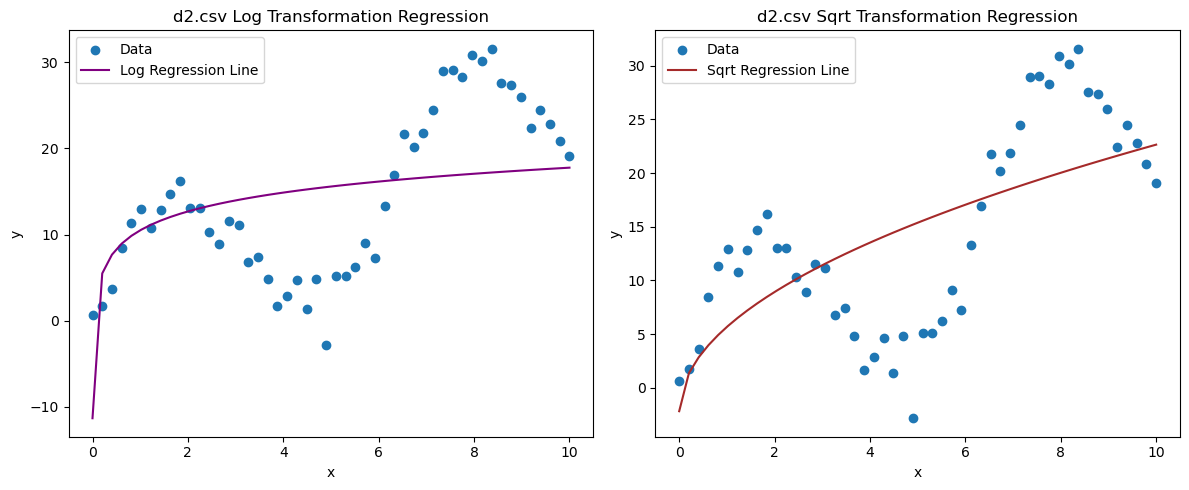

In [9]:
# Try variable transformations for d2.csv
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df_d2[['x']].values
y = df_d2['y'].values

# Log transformation (avoid log(0) by adding small constant)
X_log = np.log(X + 1e-3)
model_log = LinearRegression()
model_log.fit(X_log, y)
y_log_pred = model_log.predict(X_log)
r2_log = r2_score(y, y_log_pred)

# Sqrt transformation
X_sqrt = np.sqrt(X)
model_sqrt = LinearRegression()
model_sqrt.fit(X_sqrt, y)
y_sqrt_pred = model_sqrt.predict(X_sqrt)
r2_sqrt = r2_score(y, y_sqrt_pred)

print(f"Log Transformation R^2 for d2.csv: {r2_log:.3f}")
print(f"Sqrt Transformation R^2 for d2.csv: {r2_sqrt:.3f}")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X, y, label='Data')
plt.plot(X, y_log_pred, color='purple', label='Log Regression Line')
plt.title('d2.csv Log Transformation Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X, y, label='Data')
plt.plot(X, y_sqrt_pred, color='brown', label='Sqrt Regression Line')
plt.title('d2.csv Sqrt Transformation Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

Sin(x) Transformation R^2 for d2.csv: 0.400


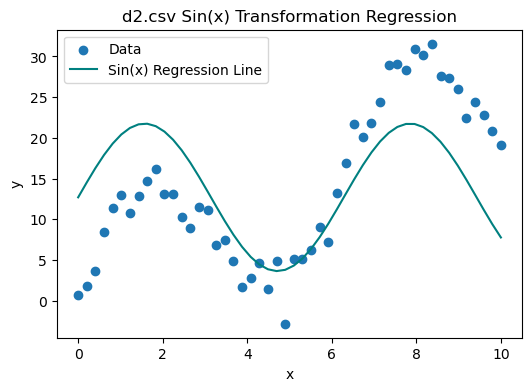

In [10]:
# Try sin(x) transformation for d2.csv
X = df_d2[['x']].values
y = df_d2['y'].values

# sin(x) transformation
X_sin = np.sin(X)
model_sin = LinearRegression()
model_sin.fit(X_sin, y)
y_sin_pred = model_sin.predict(X_sin)
r2_sin = r2_score(y, y_sin_pred)

print(f"Sin(x) Transformation R^2 for d2.csv: {r2_sin:.3f}")

plt.figure(figsize=(6,4))
plt.scatter(X, y, label='Data')
plt.plot(X, y_sin_pred, color='teal', label='Sin(x) Regression Line')
plt.title('d2.csv Sin(x) Transformation Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Sin(x) Transformation Test R^2 for d2.csv: 0.468


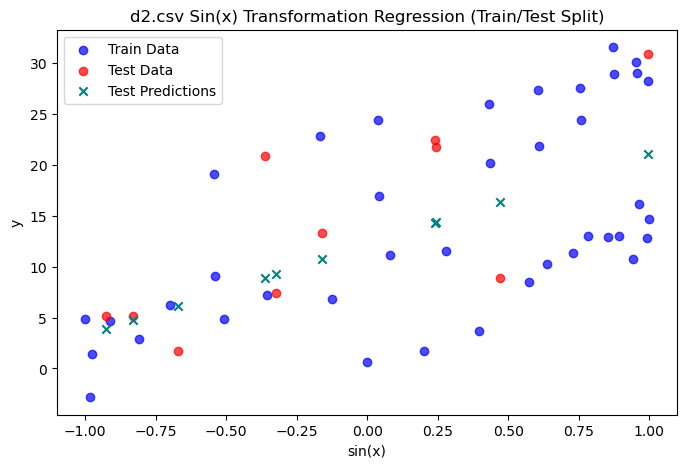

: 

In [ ]:
# Sin(x) transformation with train/test split for d2.csv
from sklearn.model_selection import train_test_split

X = df_d2[['x']].values
y = df_d2['y'].values

# sin(x) transformation
X_sin = np.sin(X)

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_sin, y, test_size=0.2, random_state=42)

# Fit model on train data
model_sin = LinearRegression()
model_sin.fit(X_train, y_train)

# Predict on test data
y_test_pred = model_sin.predict(X_test)
r2_sin_test = r2_score(y_test, y_test_pred)

print(f"Sin(x) Transformation Test R^2 for d2.csv: {r2_sin_test:.3f}")

# Plot train and test predictions
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.7)
plt.scatter(X_test, y_test, color='red', label='Test Data', alpha=0.7)
plt.scatter(X_test, y_test_pred, color='teal', label='Test Predictions', marker='x')
plt.title('d2.csv Sin(x) Transformation Regression (Train/Test Split)')
plt.xlabel('sin(x)')
plt.ylabel('y')
plt.legend()
plt.show()